In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
deliveries = pd.read_csv('archive/IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('archive/IPL Matches 2008-2020.csv')

In [3]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matches.replace(x,y,inplace = True)#replace x with y full name to short one
deliveries.replace(x,y,inplace = True)#replace wherever x is there to short form

In [5]:
deliveries

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,DC,MI
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,DC,MI
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,DC,MI
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,DC,MI


In [6]:
matches['season'] = matches['date'].str[:4].astype(int)#to take the year

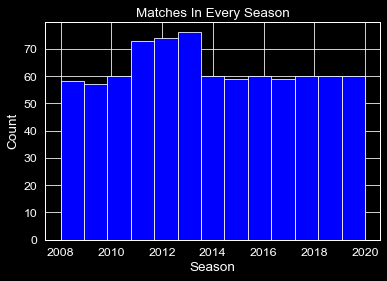

In [7]:
sns.set_style("white")
sns.set_context('paper',font_scale=1.4)
plt.style.use("dark_background")
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Matches In Every Season')
plt.grid(True)
plt.hist(matches['season'],color='blue',bins=13)
plt.show()

The year 2013 has the most matches, possibly due to super overs. Also, there are 10 teams in 2011, 9 in 2012 and 2013, this is another reason for the increase in the number of matches.

In [8]:
df=pd.DataFrame(matches.venue.value_counts())

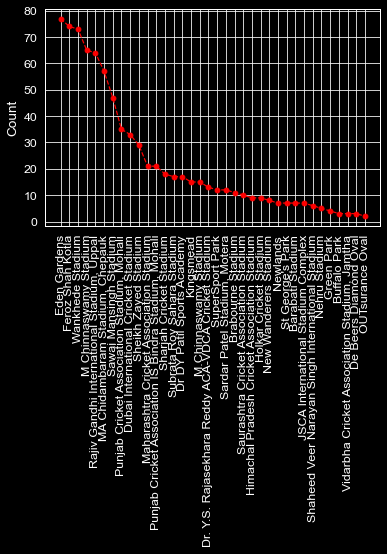

In [9]:
plt.plot(df.index,df.venue,marker='o',linestyle='--',color='r')
plt.xticks(rotation = 90)
sns.set_style('darkgrid')
sns.set_context('paper',font_scale=1.0)
plt.grid(True)
plt.ylabel('Count')
plt.show()

In [10]:
matches_played=pd.concat([matches['team1'],matches['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=matches['winner'].value_counts().reset_index()['winner']


In [11]:
matches_played.set_index('Team',inplace=True)
totm = matches_played.reset_index().head(8)
totm

,Team,Total Matches,wins
0,MI,203,120
1,SRH,199,106
2,RCB,195,99
3,DC,194,95
4,KKR,192,91
5,KXIP,190,88
6,CSK,178,86
7,RR,161,81


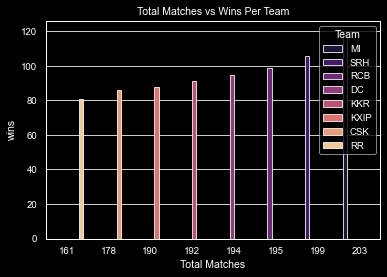

In [12]:
sns.set_style("white")
sns.set_context('paper',font_scale=1.1)
plt.style.use("dark_background")
plt.title('Total Matches vs Wins Per Team')
plt.xlabel('Total Matches')
plt.ylabel('Wins')
plt.grid(True)

sns.barplot(x='Total Matches',y='wins',data=totm,palette='magma',hue='Team')
plt.show()

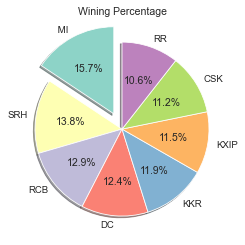

In [13]:
sns.set_style('dark')
slices = [120,106,99,95,91,88,86,81]
labels = [' MI','SRH','RCB','DC','KKR','KXIP','CSK','RR']
explode=[0.2,0,0,0,0,0,0,0]
plt.pie(slices,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%.1f%%')
plt.title("Wining Percentage")
plt.show()

In [14]:
matches_played

,Total Matches,wins
Team,,
MI,203,120
SRH,199,106
RCB,195,99
DC,194,95
KKR,192,91
KXIP,190,88
CSK,178,86
RR,161,81
PW,46,15


In [15]:

deliveries.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

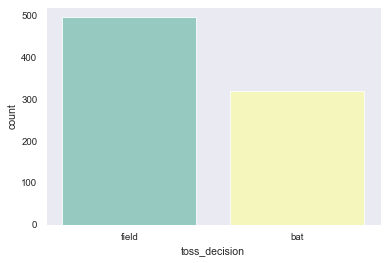

In [16]:
matches.toss_decision.value_counts()
sns.countplot('toss_decision',data=matches)


In [17]:
matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


In [18]:
deliveries.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [19]:
df3=pd.DataFrame(matches.season,deliveries.total_runs)

In [20]:
df3

,season
total_runs,
1,2008
1,2008
0,2008
1,2008
1,2008
...,...
0,2008
1,2008
1,2008


In [21]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']

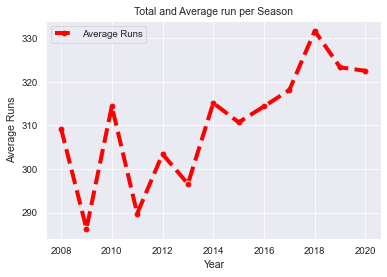

In [22]:
plt.plot(avgruns_each_season['season'],avgruns_each_season['average_runs_per_match'],marker='o',linestyle='--',linewidth=4,color='r',label='Average Runs')
plt.title('Total and Average run per Season')
plt.xlabel('Year')
plt.ylabel('Average Runs')
plt.legend()
plt.grid(True)

plt.show()

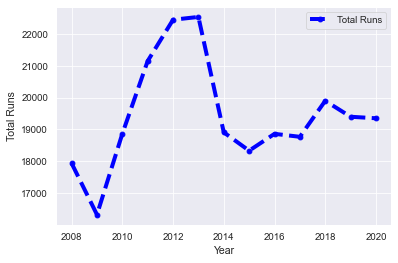

In [23]:
plt.plot(avgruns_each_season['season'],avgruns_each_season['total_runs'],marker='o',linestyle='--',linewidth=4,color='b',label='Total Runs')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)

plt.show()

In [24]:
matches.head(1)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008


In [25]:
deliveries.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [26]:
drt=deliveries.groupby(['inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [27]:
drt=drt[drt['total_runs']>=200]
drt = drt.nlargest(10,'total_runs')

In [28]:
drt.total_runs=[]

,inning,batting_team,bowling_team,total_runs
51,1,MI,DC,3080
98,1,SRH,KXIP,2981
95,1,SRH,DC,2863
101,1,SRH,RCB,2825
50,1,MI,CSK,2755
120,2,DC,SRH,2730
59,1,MI,RR,2721
151,2,KXIP,SRH,2699
43,1,KXIP,KKR,2669
31,1,KKR,RCB,2623
